In [28]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from google.colab import drive
drive.mount('/content/drive/folders/17Xwk2quPb1gFmjG3KVIoZqChrWdcZ8XS')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
def get_data(path: str) -> tuple:
    x = []
    y = []
    with open(path) as fs:
        reader = csv.reader(fs, delimiter=',')
        for row in reader:
            try:
                x.append(float(row[1]))
                y.append(float(row[2]))
            except:
                ...
    return np.array(x), np.array(y)

In [23]:
def gradient_descent(x, y, b_0, b_1, D_b_0_prev, D_b_1_prev, l=0.01):
    y_pred = b_0 + b_1 * x
    n = len(x)
    D_b_0 = (-2 / n) * sum(y - y_pred)
    D_b_1 = (-2 / n) * sum(x * (y - y_pred))
    if np.abs(D_b_0) >= np.abs(D_b_0_prev) and np.abs(D_b_1) >= np.abs(D_b_1_prev):
        return b_0, b_1, D_b_0, D_b_1, False
    b_0 = b_0 - l * D_b_0
    b_1 = b_1 - l * D_b_1
    return b_0, b_1, D_b_0, D_b_1, True

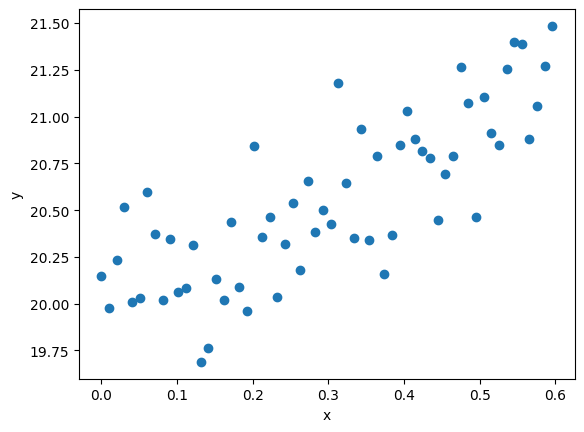

In [26]:
# train_x, train_y = get_data('lab_1_train.csv')
train_x, train_y = get_data('drive/MyDrive/Colab Notebooks/lab_1_train.csv')
# test_x, test_y = get_data('lab_1_test.csv')
test_x, test_y = get_data('drive/MyDrive/Colab Notebooks/lab_1_test.csv')

plt.scatter(train_x, train_y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


   b_0       b_1       eps      epoch   
 0.41099   0.12368    404.26      0     
  16.84     4.9347    5.3545     100    
  18.701    5.2917   0.48292     200    
  18.955    5.168    0.38722     300    
  19.031    5.0003   0.35324     400    
  19.084    4.8362    0.3235     500    
  19.132    4.6804   0.29692     600    
  19.177    4.533    0.27316     700    
  19.22     4.3937   0.25192     800    
  19.26     4.262    0.23294     900    
  19.298    4.1374   0.21597     1000   
  19.334    4.0197    0.2008     1100   
  19.368    3.9083   0.18724     1200   
  19.401    3.8031   0.17512     1300   
  19.431    3.7036   0.16429     1400   
  19.46     3.6095    0.1546     1500   
  19.487    3.5205   0.14595     1600   
  19.513    3.4364   0.13821     1700   
  19.537    3.3569   0.13129     1800   
  19.56     3.2817   0.12511     1900   
  19.582    3.2107   0.11958     2000   
  19.603    3.1435   0.11464     2100   
  19.622    3.0799   0.11023     2200   
  19.641    3.01

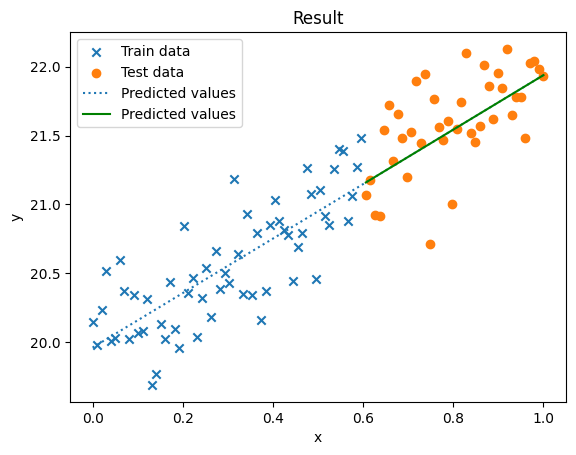

In [27]:
b_0, b_1 = 0, 0
D_b_0, D_b_1 = np.inf, np.inf

n = len(train_x)
epochs = 100000
l = 0.01
eps = np.inf
e = 0

print("{0:^10.5}{1:^10.5}{2:^10.5}{3:^10.5}".format('b_0', 'b_1', 'eps', 'epoch'))
for e in range(epochs):
    b_0, b_1, D_b_0, D_b_1, conv = gradient_descent(train_x, train_y, b_0, b_1, D_b_0, D_b_1, l)
    eps = sum((train_y - (b_0 + b_1 * train_x)) ** 2) / n
    if not conv:
        break
    if e % 100 == 0:
        print(f"{b_0:^10.5}{b_1:^10.5}{eps:^10.5}{e:^10}")
print(f"{b_0:^10.5}{b_1:^10.5}{eps:^10.5}{e:^10}")

### 1
plt.scatter(train_x, train_y, marker='x', label='Train data')
### 2
plt.scatter(test_x, test_y, marker='o', label='Test data')

### 3
X = np.concatenate((train_x, test_x))
Y = b_0 + b_1 * X
plt.plot(X, Y, ':', label='Predicted values')

### 4
pred_y = b_0 + b_1 * test_x
plt.plot(test_x, pred_y, 'g-', label='Predicted values')

plt.title('Result')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [ ]:
print('Mean Squared Error for test data:', np.sum(np.power(lr.predict(x_test) - y_test, 2)) / x_test.shape[0])

In [ ]:
Mean Squared Error for test data: 0.12561495704054582